In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


In [4]:
!pip install tensorflow==2

     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 3.8MB 53.7MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import normalize, to_categorical

from sklearn.model_selection import train_test_split
print(tf.__version__)

Using TensorFlow backend.


2.0.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling




In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
path = root_dir + 'Dane/'
path

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


'/content/gdrive/My Drive/Dane/'

In [8]:
df = pd.read_csv(path + 'mieszkania_enc.csv')
df.head()

powierzchnia  liczba_pokoi  ...  typ_zabudowy=Loft  typ_zabudowy=Plomba
0         71.00             4  ...                0.0                  0.0
1         49.95             2  ...                0.0                  0.0
2         42.00             2  ...                0.0                  0.0
3         54.10             2  ...                0.0                  0.0
4         58.00             3  ...                0.0                  0.0

[5 rows x 695 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35476 entries, 0 to 35475
Columns: 695 entries, powierzchnia to typ_zabudowy=Plomba
dtypes: float64(692), int64(3)
memory usage: 188.1 MB


In [0]:
df['cena'] = df['cena'] / 1000

In [11]:
df.head()

powierzchnia  liczba_pokoi  ...  typ_zabudowy=Loft  typ_zabudowy=Plomba
0         71.00             4  ...                0.0                  0.0
1         49.95             2  ...                0.0                  0.0
2         42.00             2  ...                0.0                  0.0
3         54.10             2  ...                0.0                  0.0
4         58.00             3  ...                0.0                  0.0

[5 rows x 695 columns]

In [0]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [13]:
train_stats = train_dataset.describe()
train_stats.pop("cena")
train_stats = train_stats.transpose()
train_stats

count       mean  ...    75%    max
powierzchnia                                28381.0  59.013460  ...  69.76  154.6
liczba_pokoi                                28381.0   2.594482  ...   3.00    4.0
pietro                                      28381.0   2.551249  ...   4.00   10.0
miejscowosc=Bydgoszcz                       28381.0   0.032416  ...   0.00    1.0
miejscowosc=Gdańsk                          28381.0   0.063740  ...   0.00    1.0
...                                             ...        ...  ...    ...    ...
typ_zabudowy=Blok                           28381.0   0.774779  ...   1.00    1.0
typ_zabudowy=Dom Wielorodzinny/Szeregowiec  28381.0   0.017829  ...   0.00    1.0
typ_zabudowy=Kamienica                      28381.0   0.073676  ...   0.00    1.0
typ_zabudowy=Loft                           28381.0   0.000035  ...   0.00    1.0
typ_zabudowy=Plomba                         28381.0   0.000282  ...   0.00    1.0

[694 rows x 8 columns]

In [0]:
train_labels = train_dataset.pop('cena')
test_labels = test_dataset.pop('cena')

In [0]:
def build_model():
    model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               355840    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 528,385
Trainable params: 528,385
Non-trainable params: 0
_________________________________________________________________


In [35]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[0.79023564],
       [1.1782422 ],
       [1.5595802 ],
       [0.82158506],
       [1.1385384 ],
       [1.5590942 ],
       [2.5026376 ],
       [1.0334187 ],
       [1.0092545 ],
       [2.2071226 ]], dtype=float32)

In [36]:
EPOCHS = 500

model = build_model()


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:33165.4187,  mae:117.2846,  mse:33165.4219,  val_loss:20845.7762,  val_mae:96.4208,  val_mse:20845.7773,  
....................................................................................................
Epoch: 100, loss:12953.1696,  mae:65.5098,  mse:12953.1797,  val_loss:15233.9330,  val_mae:75.0107,  val_mse:15233.9307,  
............

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Cena]')

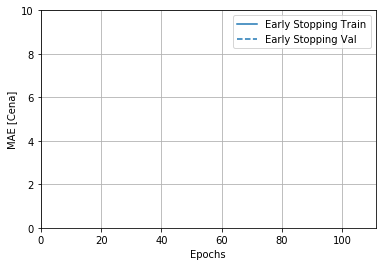

In [38]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Cena]')

In [41]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Zbiór testowy Mean Abs Error: {:5.2f} cena".format(mae))

7095/7095 - 0s - loss: 16613.9200 - mae: 74.0821 - mse: 16613.9199
Zbiór testowy Mean Abs Error: 74.08 cena


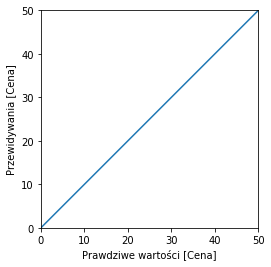

In [42]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Prawdziwe wartości [Cena]')
plt.ylabel('Przewidywania [Cena]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

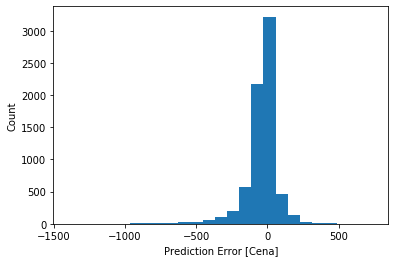

In [43]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Cena]")
_ = plt.ylabel("Count")